**Prerequisits**

In [69]:
%pip install pandas
%pip install jinja2
%pip install scikit-learn
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 0.0/158.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/158.1 kB ? eta -:--:--
     --------------------------- ---------- 112.6/158.1 kB 3.3 MB/s eta 0:00:01
     -------------------------------------- 158.1/158.1 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ----------------------- ---------------- 174.1/294.6 kB 5.1 MB/s eta 0:00:01
   -------------------------- ------------- 194.6/294.6 kB 5.8 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.6 MB 8.3 MB/s eta 0:00:01
   - ----------------------------------

**Imports**

In [75]:
import pandas as pd
import joblib
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import MultinomialNB

**Loading and cleaning datasets**

In [44]:
file_path = "dataset\\SQL_Dataset.csv"
df = pd.read_csv(file_path)
df= df.dropna()
df=df.drop_duplicates()
display(df.head().style.map(lambda x: 'font-weight: bold;text-align: left;color: red;'))
display(HTML("<hr>"))
df.info()
display(HTML("<hr>"))
df.describe().style.map(lambda x: 'text-align: center;')

,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 temporary tablespace temp default tablespace users;,1
2,"AND 1 = utl_inaddr.get_host_address ( ( SELECT DISTINCT ( table_name ) FROM ( SELECT DISTINCT ( table_name ) , ROWNUM AS LIMIT FROM sys.all_tables ) WHERE LIMIT = 5 ) ) AND 'i' = 'i",1
3,"select * from users where id = '1' or @ @1 = 1 union select 1,version ( ) -- 1'",1
4,"select * from users where id = 1 or 1#"" ( union select 1,version ( ) -- 1",1


<class 'pandas.core.frame.DataFrame'>
Index: 30907 entries, 0 to 30918
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Query   30907 non-null  object
 1   Label   30907 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 724.4+ KB


,Label
count,30907.000000
mean,0.368137
std,0.482307
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


**Splitting dataset**

In [63]:
X = df['Query']
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(HTML("<h2>X_train (Training Data):</h2>"))
display(X_train.head())
display(HTML("<hr>"))

display(HTML("<h2>X_test (Testing Data):</h2>"))
display(X_test.head())
display(HTML("<hr>"))

display(HTML("<h2>y_train (Training Labels):</h2>"))
display(y_train.head())
display(HTML("<hr>"))

display(HTML("<h2>y_test (Testing Labels):</h2>"))
display(y_test.head())
display(HTML("<hr>"))


11322    -8609%"   )    )     )   union all select 6021...
6926                               -6546"  )   order by 1#
29671    SELECT AVG ( thick )  FROM hall  SELECT SUM ( ...
9403     1"   )    )     )   and   (  7396  =  6351  ) ...
15044                                              sojuela
Name: Query, dtype: object

2154     1"   )    )    and   (  select * from   (  sel...
19684    SELECT * FROM wp_posts WHERE ID  =  28694 LIMIT 1
3877     1'  )   as uqkz where 8482  =  8482 and 8407  ...
13708                                         madan deluca
23058       SELECT * FROM  ( SELECT birds FROM attached ) 
Name: Query, dtype: object

11322    1
6926     1
29671    0
9403     1
15044    0
Name: Label, dtype: int64

2154     1
19684    0
3877     1
13708    0
23058    0
Name: Label, dtype: int64

## Multinomial Naïve Bayes

In [93]:
vectorizer = CountVectorizer(ngram_range=(1, 4))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
mnb_model = MultinomialNB()
mnb_model.fit(X_train_vectorized, y_train)
joblib.dump(mnb_model, 'models/mnb_model.joblib')

# Make predictions on the test set
y_pred = mnb_model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
display(HTML("<hr>"))

print("Confusion Matrix:")
print(conf_matrix)
display(HTML("<hr>"))

print("Classification Report:")
print(classification_rep)
display(HTML("<hr>Model saved"))


Accuracy: 0.973471368489162


Confusion Matrix:
[[3859   53]
 [ 111 2159]]


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3912
           1       0.98      0.95      0.96      2270

    accuracy                           0.97      6182
   macro avg       0.97      0.97      0.97      6182
weighted avg       0.97      0.97      0.97      6182



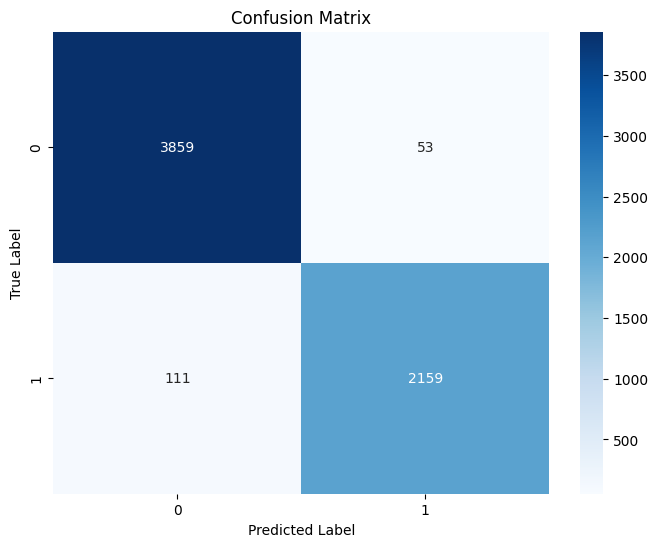

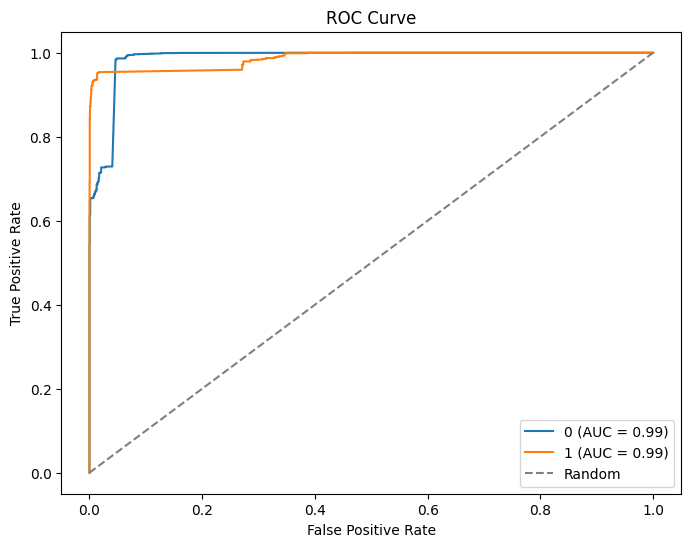

In [94]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=mnb_model.classes_, yticklabels=mnb_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

y_prob = mnb_model.predict_proba(X_test_vectorized)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(mnb_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve((y_test == mnb_model.classes_[i]).astype(int), y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))

for i in range(len(mnb_model.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'{mnb_model.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Bernoulli’s Naïve Bayes